Explained Variance Ratio: [0.3057662  0.22358676 0.20173168]


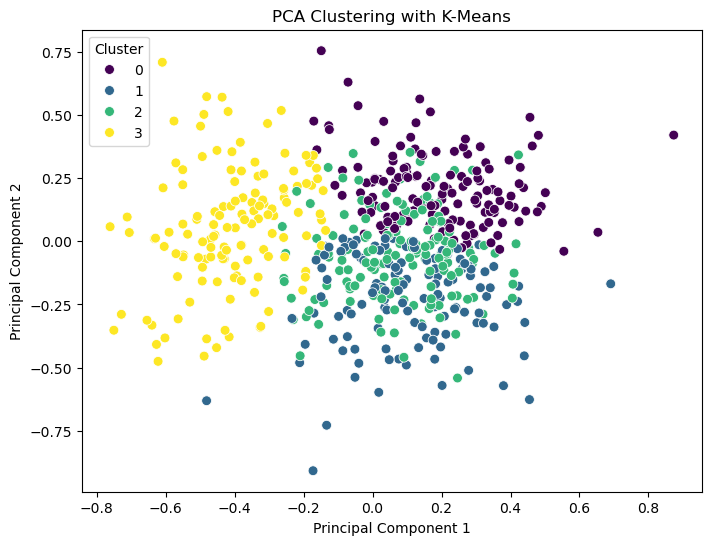

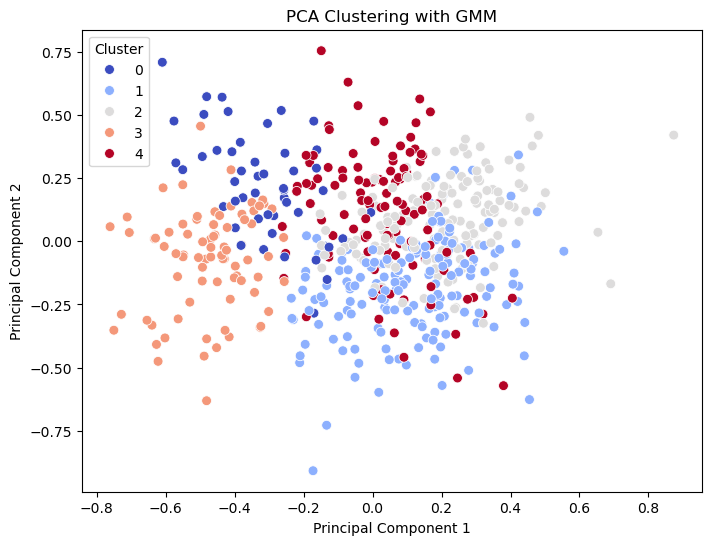

K-Means Cluster Distribution:
KMeans_Cluster
2    157
0    145
3    132
1    125
Name: count, dtype: int64

GMM Cluster Distribution:
GMM_Cluster
1    169
2    151
4    111
3     79
0     49
Name: count, dtype: int64


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/Users/kkelley/Desktop/CBB Results/CBBML.csv')

df.dropna(inplace=True)  # Drop missing values
df = df.round(2)  # Round numeric columns for clarity

# Define features for clustering
features = [#'Away Score', 'Home Score', 
    'Away OR', 'Away DR', 'Away AT',
            'Home OR', 'Home DR', 'Home AT', 'delta OR', 'delta DR', 'delta AT']
X = df[features]

# Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=3)  # Reduce to 5 components
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_pca)

# Apply Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_pca)

# Plot PCA results for K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='viridis', s=50)
plt.title("PCA Clustering with K-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Plot PCA results for GMM
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['GMM_Cluster'], palette='coolwarm', s=50)
plt.title("PCA Clustering with GMM")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Check cluster distribution
print("K-Means Cluster Distribution:")
print(df['KMeans_Cluster'].value_counts())
print("\nGMM Cluster Distribution:")
print(df['GMM_Cluster'].value_counts())






